In [1]:
import pandas as pd
import os
import sys
from glob import glob
import numpy as np
from sklearn.decomposition import PCA  # , KernelPCA  # runs out of ram
# import umap  # runs out of ram
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import gc

main_dir = os.path.abspath(os.pardir)
sys.path.insert(0, main_dir)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.precision = 8
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
data_path = os.path.join(main_dir, "data")+os.sep
interim_path = os.path.join(data_path, "interim")+os.sep
csv_files = glob(interim_path+"*.csv")
ml_data_fname = "ml_data.gzip"
for i, file in enumerate(csv_files):
    if file.rsplit('\\', 1)[-1] == ml_data_fname:
        csv_files.remove(file)

cmp_n_max = 20
exp_var_rto = 0.03

In [3]:
df1 = pd.read_csv(interim_path+"cl.csv", low_memory=False, usecols=["filename", "class"])
train_ind = df1["filename"][~df1["filename"].str.startswith("tst_")].index
pca_redcr = dict()

Progress 9.0% file acc_.csv, 4 components explain 91.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.404,0.265,0.211,0.033,0.010,0.008,0.007,0.007,0.006,0.006,0.006,0.005,0.005,0.005,0.004,0.004,0.004,0.003,0.003,0.002


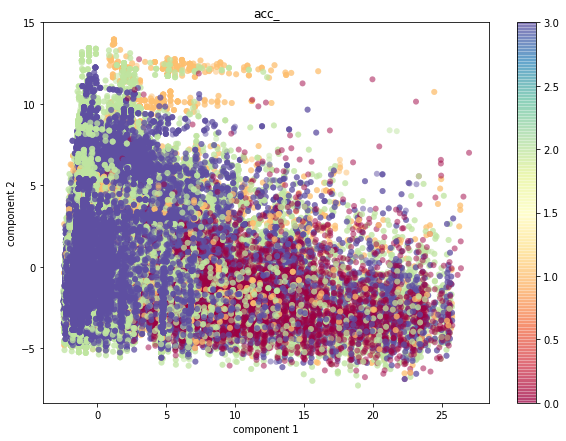

Progress 18.0% file bpp_.csv, 5 components explain 47.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.196,0.144,0.059,0.044,0.030,0.028,0.023,0.022,0.020,0.019,0.015,0.014,0.012,0.012,0.011,0.010,0.010,0.009,0.009,0.009


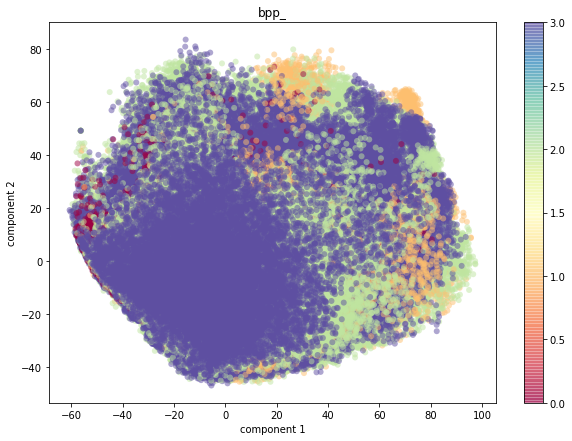

Progress 27.0% file ch_.csv, 4 components explain 100.0% variance.


,0,1,2,3
0,0.577,0.186,0.153,0.084


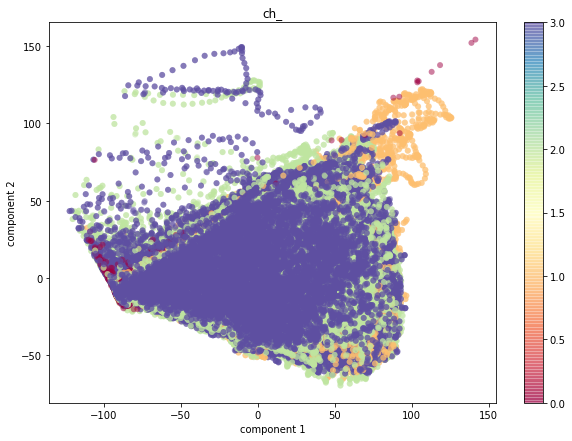

Progress 36.0% file cl_.csv, 9 components explain 81.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.193,0.180,0.104,0.093,0.061,0.052,0.046,0.039,0.038,0.027,0.027,0.025,0.024,0.023,0.014,0.012,0.011,0.010,0.008,0.007


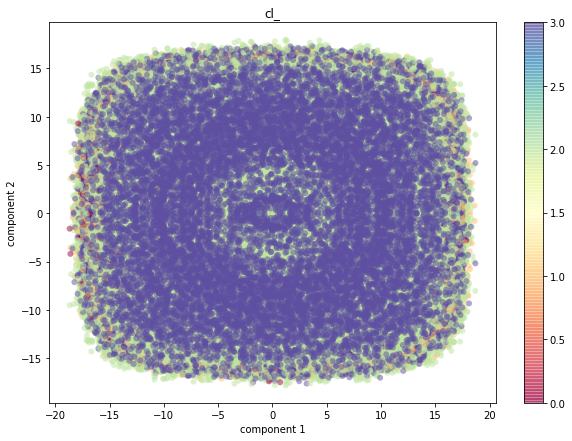

Progress 45.0% file eh_.csv, 8 components explain 41.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.074,0.070,0.053,0.051,0.048,0.044,0.036,0.034,0.023,0.022,0.020,0.020,0.019,0.019,0.017,0.016,0.015,0.015,0.014,0.013


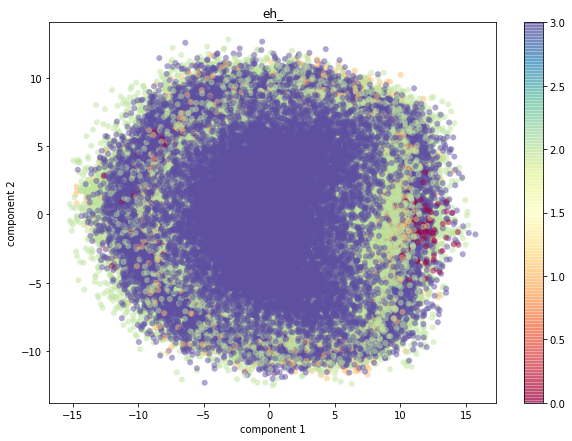

Progress 55.00000000000001% file fcth_.csv, 7 components explain 97.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.545,0.122,0.100,0.071,0.053,0.039,0.035,0.022,0.004,0.004,0.002,0.002,0.001,0.000,0.000,0.000,0.000,0.000


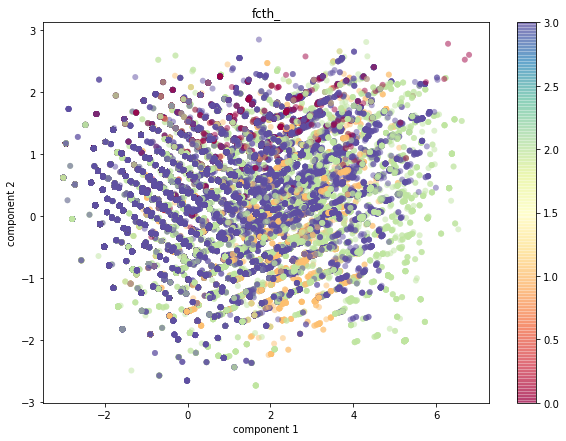

Progress 64.0% file foh_.csv, 3 components explain 99.0% variance.


,0,1,2,3,4,5,6
0,0.798,0.152,0.038,0.008,0.003,0.001,0.000


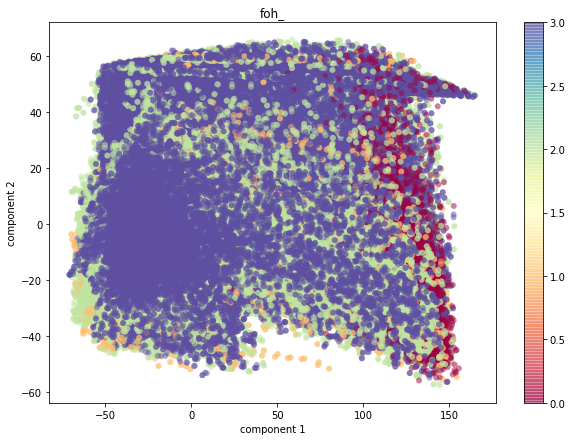

Progress 73.0% file gabor_.csv, 1 components explain 100.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Progress 82.0% file jc_.csv, 5 components explain 88.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.466,0.241,0.085,0.050,0.040,0.026,0.018,0.015,0.007,0.006,0.005,0.004,0.004,0.003,0.003,0.003,0.002,0.001,0.001,0.001


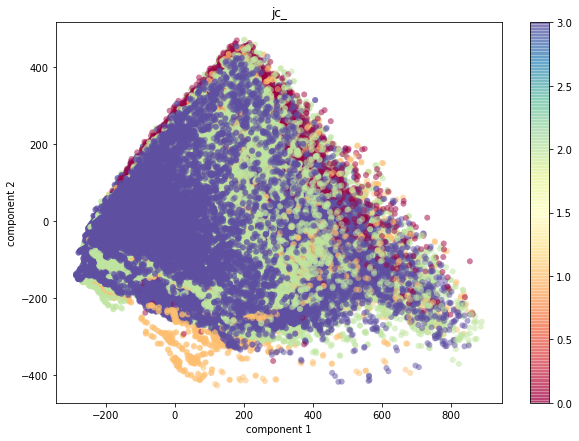

Progress 91.0% file phog_.csv, 8 components explain 46.0% variance.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.164,0.059,0.058,0.045,0.041,0.035,0.032,0.031,0.023,0.021,0.018,0.016,0.016,0.014,0.012,0.011,0.011,0.010,0.009,0.009


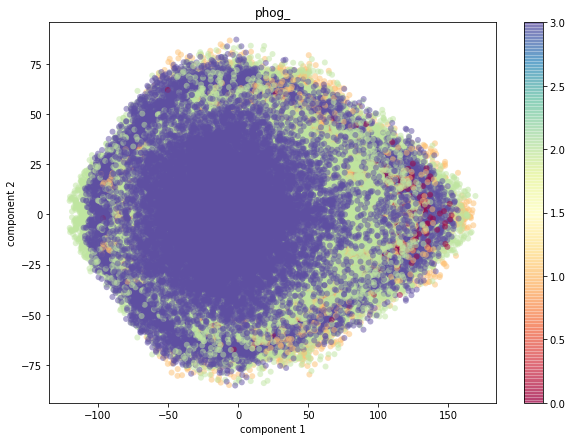

(609476, 56)


,filename,class,acc_0,acc_1,acc_2,acc_3,bpp_0,bpp_1,bpp_2,bpp_3,bpp_4,ch_0,ch_1,ch_2,ch_3,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,eh_0,eh_1,eh_2,eh_3,eh_4,eh_5,eh_6,eh_7,fcth_0,fcth_1,fcth_2,fcth_3,fcth_4,fcth_5,fcth_6,foh_0,foh_1,foh_2,gabor_0,jc_0,jc_1,jc_2,jc_3,jc_4,phog_0,phog_1,phog_2,phog_3,phog_4,phog_5,phog_6,phog_7
0,trn_t1_1131_0.jpg,t1,12.327,2.665,-5.816,0.481,-28.960,-16.269,7.770,17.961,6.710,-89.227,-10.765,30.354,5.934,-4.038,-3.177,8.300,-8.327,6.222,-8.764,-1.112,9.089,0.339,9.318,-0.946,-0.211,5.205,-0.292,-5.203,1.196,0.434,2.660,1.508,0.685,0.369,0.201,0.827,0.067,147.424,-26.262,-7.322,3.000,252.798,299.798,-40.613,-34.321,30.891,55.275,5.941,-21.182,27.128,5.078,5.886,-14.055,-17.120
1,trn_t1_1131_1.jpg,t1,1.959,4.357,-4.279,0.186,-12.160,-19.623,9.534,5.774,2.262,-39.849,-18.505,3.088,0.237,-4.855,-4.286,7.222,-5.679,6.468,-8.478,-0.568,3.553,4.453,9.168,0.175,1.013,4.319,-0.867,-3.485,1.538,1.378,2.889,0.298,1.176,0.210,0.001,0.494,-0.040,105.686,-17.430,-6.722,1.521,239.304,227.388,-58.812,-49.020,6.532,69.369,15.126,-27.558,19.003,12.613,4.687,-19.068,-16.757
2,trn_t1_1131_10.jpg,t1,-1.394,5.561,-3.227,-0.195,-7.646,-21.714,-6.512,11.800,1.004,46.228,-1.352,4.303,-0.732,2.633,-6.884,4.777,-1.200,8.110,-2.380,5.867,0.471,-10.470,3.654,3.623,2.532,2.339,2.747,4.022,7.301,-0.618,3.054,-1.016,-0.290,0.570,-0.032,0.215,0.139,-44.504,-6.186,-8.939,-4.688,67.397,23.731,-29.357,-132.782,31.699,52.540,8.859,44.131,-4.615,-1.027,-2.882,-25.129,13.135
3,trn_t1_1131_11.jpg,t1,-1.475,5.247,-3.574,-0.189,-20.146,-11.150,-5.845,10.915,4.672,52.431,11.343,10.601,3.706,3.004,-6.468,4.961,3.567,10.210,-1.956,5.928,-0.604,-8.431,3.074,-0.173,-0.009,3.258,2.321,4.554,7.694,-0.668,3.342,-0.912,-0.567,-0.136,-0.571,0.384,0.033,-38.619,-11.040,-11.723,-4.236,6.983,40.281,-23.924,-141.649,32.197,46.141,-4.687,46.247,-4.206,1.742,-0.287,-26.836,14.518
4,trn_t1_1131_12.jpg,t1,-1.389,5.417,-3.087,0.178,-11.766,-11.779,-2.870,2.791,5.565,48.347,16.474,2.996,5.979,3.045,-6.541,3.722,8.430,9.990,-0.040,7.042,0.195,-3.369,3.021,-3.560,0.356,3.950,2.747,4.036,5.465,-0.298,3.054,-1.016,-0.290,0.570,-0.032,0.215,0.139,-46.872,-3.677,-12.214,-3.158,21.461,37.924,-25.596,-130.340,19.984,50.278,-21.779,37.797,-3.283,1.844,-4.990,-22.323,16.923


In [4]:
for i, file in enumerate(csv_files):
    prfx_str = file.rsplit('\\', 1)[-1].replace(".csv","")+"_"
    print("Progress "+str(round(((i+1)/(len(csv_files)+1)), 2)*100)+"% file "+prfx_str+".csv", end=", ")
    df_temp = pd.read_csv(file, low_memory=False).drop(columns=["filename", "class"])
    num_cols = df_temp.select_dtypes(np.number).columns
    drop_cols = num_cols[df_temp[num_cols].sum(axis=0) == 0]
    df_temp = df_temp.drop(columns=drop_cols)
    num_cols = df_temp.select_dtypes(np.number).columns
    
    # linear reduction
    if len(num_cols) > cmp_n_max:
        pca_cmpnts = cmp_n_max
    else:
        pca_cmpnts = len(num_cols)
    pca_redcr[prfx_str] = PCA(n_components=pca_cmpnts, copy=False, random_state=123)
    pca_redcr[prfx_str].fit(df_temp.loc[train_ind, num_cols])
    train_data = pca_redcr[prfx_str].transform(df_temp[num_cols])
    n_cmpnts = np.where(pca_redcr[prfx_str].explained_variance_ratio_ >= exp_var_rto)[0]
    xplnt_var = pca_redcr[prfx_str].explained_variance_ratio_[:n_cmpnts[-1]+1].sum().round(2)
    print(str(n_cmpnts[-1]+1)+" components explain "+str(xplnt_var*100)+"% variance.")
    display(pd.DataFrame(pca_redcr[prfx_str].explained_variance_ratio_).T)
    train_data = pd.DataFrame(train_data, dtype=np.float32)[n_cmpnts]
    
    if len(n_cmpnts) > 1:
        plt.figure(figsize=(10, 7))
        plt.scatter(train_data[0], train_data[1],
                    c=df1["class"].replace(["t1", "t2", "t3", np.nan], [1, 2, 3, 0]),
                    edgecolor='none', alpha=0.5, cmap=cm.get_cmap("Spectral"))
        plt.title(prfx_str)
        plt.xlabel('component 1')
        plt.ylabel('component 2')
        plt.colorbar()
        plt.show()
    
    train_data = train_data.add_prefix(prfx_str)
    df_temp = df_temp.drop(columns=num_cols)
    df_temp = pd.concat([df_temp, train_data], axis=1)
    df1 = pd.concat([df1, df_temp], axis=1)
    del df_temp, train_data
    gc.collect()
print(df1.shape)
display(df1.head())

## File saving

In [5]:
train_ind = df1["class"][df1["class"].notna()].index
test_ind = df1["class"][df1["class"].isna()].index

df2 = df1.loc[train_ind].reset_index(drop=True).append(df1.loc[test_ind], ignore_index=True)

df2["type"] = df2["filename"].str.extract("^(trn|vld|tst)_", expand=False).rename("type")
df2["add"] = df2["filename"].str.extract("_(add)_", expand=False).rename("add").fillna("non_add")
df2["flip"] = df2["filename"].str.extract("_(flip)_", expand=False).rename("flip").fillna("non_flip")
df2["img_id"] = pd.to_numeric(df2["filename"].str.extract("_(\d+)_", expand=False).rename("img_id"), downcast="unsigned")
df2["rot_id"] = pd.to_numeric(df2["filename"].str.extract("_(\d+).jpg", expand=False).rename("rot_id"), downcast="unsigned")
df2["grp_key"] = df2["type"].astype(str)+"_"+df2["class"].astype(str)+"_"+df2["add"].astype(str)+"_"+df2["img_id"].astype(str)

In [6]:
img_grps = df2[["type", "add", "flip", "img_id","grp_key","rot_id"]].groupby("grp_key", sort=False, as_index=False).apply(
    lambda x: x.sample(frac=1, random_state=123)).reset_index()
df2 = pd.concat([df2, pd.Series(img_grps["level_0"], index=img_grps["level_1"]).rename("img_grp")], axis=1)

In [7]:
# df2.dtypes

In [10]:
df2.to_parquet(interim_path+ml_data_fname, engine="fastparquet", compression="gzip", index=False)

In [59]:
# def umap_trans(n_neighbors=15, min_dist=0.1, n_components=2, plot=False):
#     reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric="euclidean")
#     embedding = reducer.fit_transform(train_data[num_vnames])
#     print("Embedding shape", embedding.shape)
    
#     if plot:
#         sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
#         plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in train_data["class"].astype(int)])
#         plt.gca().set_aspect('equal', 'datalim')
#         plt.title('UMAP projection of the dataset', fontsize=24)
#     return reducer

In [60]:
# umap_trans(5, 0.1, 2, plot=True)

In [61]:
# max_feat = 100
# umap_reducer = dict()
# for vname_type in num_bd_vnames.keys():
#     if len(num_bd_vnames[vname_type]) > max_feat//len(num_bd_vnames.keys()):
#         print(vname_type, end=" ")
#         umap_reducer[vname_type] = umap_trans(5, 0.1, int(max_feat//len(num_bd_vnames.keys())))

In [62]:
# def apply_umap(data, num_vnames=num_bd_vnames, return_reducer=False):
#     y = data["class"].copy()
#     X = pd.DataFrame()
#     for vname_type in num_bd_vnames.keys():
#         if vname_type in umap_reducer.keys():
#             umap_reducer[vname_type] = umap_trans(5, 0.1, int(max_feat//len(num_bd_vnames.keys())))
#             X = pd.concat(
#                 [X, pd.DataFrame(umap_reducer[vname_type].transform(data[num_bd_vnames[vname_type]]), index=data.index).add_prefix(vname_type)], axis=1)
#         else:
#             X = pd.concat([X, data[num_bd_vnames[vname_type]]], axis=1)
#     if return_reducer:
#         return X, y, umap_reducer
#     else:
#         return X, y

In [63]:
# X_train, y_train, umap_reducer = apply_umap(train_data, return_reducer=True)
# X_test, y_test = apply_umap(test_data)